### Importação dos dados



In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [27]:
#consultando as colunas existentes

for coluna in loja.columns:
    print(coluna)



Produto
Categoria do Produto
Preço
Frete
Data da Compra
Vendedor
Local da compra
Avaliação da compra
Tipo de pagamento
Quantidade de parcelas
lat
lon


In [46]:
# consultando o período dos dados analisados
loja["Data da Compra"] = pd.to_datetime(loja["Data da Compra"], format='%d/%m/%Y')
loja2["Data da Compra"] = pd.to_datetime(loja2["Data da Compra"], format='%d/%m/%Y')
loja3["Data da Compra"] = pd.to_datetime(loja3["Data da Compra"], format='%d/%m/%Y')
loja4["Data da Compra"] = pd.to_datetime(loja4["Data da Compra"], format='%d/%m/%Y')

for i, df in enumerate([loja, loja2, loja3, loja4], start=1):
    inicio = df["Data da Compra"].min()
    fim = df["Data da Compra"].max()
    print(f"Loja {i}: Período de {inicio.date()} até {fim.date()}")

Loja 1: Período de 2020-01-01 até 2023-03-31
Loja 2: Período de 2020-01-01 até 2023-03-31
Loja 3: Período de 2020-01-01 até 2023-03-31
Loja 4: Período de 2020-01-01 até 2023-03-30


#1. Análise do faturamento


In [28]:
#somando a tabela preço para consultar o faturamento de cada loja

faturamento_loja1 = loja["Preço"].sum()
faturamento_loja2 = loja2["Preço"].sum()
faturamento_loja3 = loja3["Preço"].sum()
faturamento_loja4 = loja4["Preço"].sum()

print("Faturamento Loja 1:", faturamento_loja1)
print("Faturamento Loja 2:", faturamento_loja2)
print("Faturamento Loja 3:", faturamento_loja3)
print("Faturamento Loja 4:", faturamento_loja4)


Faturamento Loja 1: 1534509.12
Faturamento Loja 2: 1488459.06
Faturamento Loja 3: 1464025.03
Faturamento Loja 4: 1384497.58


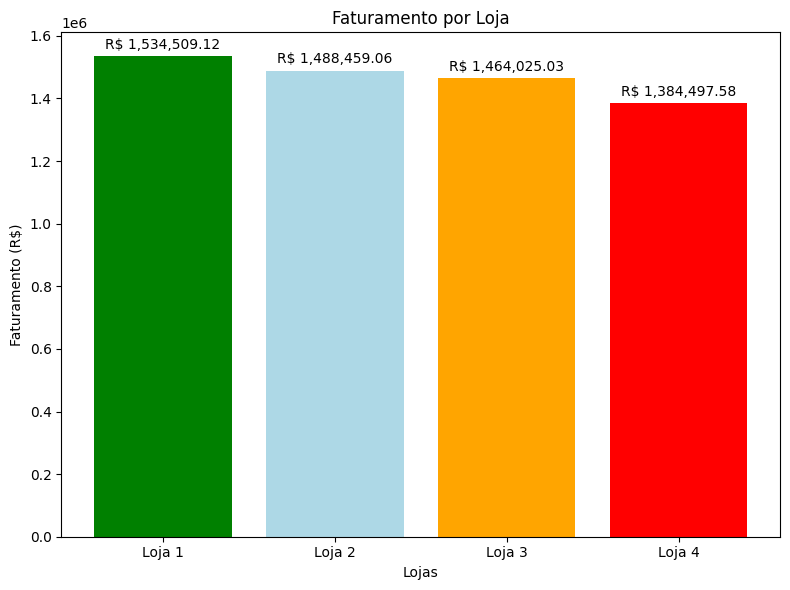

In [29]:
#plotando o gráfico do faturamento usando o matplot lib

import matplotlib.pyplot as plt

faturamento = [
    loja["Preço"].sum(),
    loja2["Preço"].sum(),
    loja3["Preço"].sum(),
    loja4["Preço"].sum()
]

lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
cores = ['green', 'lightblue', 'orange', 'red']

plt.figure(figsize=(8,6))
plt.bar(lojas, faturamento, color=cores)
plt.title("Faturamento por Loja")
plt.ylabel("Faturamento (R$)")
plt.xlabel("Lojas")
plt.xticks(rotation=0)

for i, valor in enumerate(faturamento):
    plt.text(i, valor + 0.01*max(faturamento), f'R$ {valor:,.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


# 2. Vendas por Categoria


In [8]:
#consultando as categorias existentes

loja["Categoria do Produto"].unique()


array(['eletronicos', 'moveis', 'brinquedos', 'eletrodomesticos',
       'utilidades domesticas', 'esporte e lazer', 'livros',
       'instrumentos musicais'], dtype=object)

In [9]:
# Quantidade de produtos vendidos por categoria em cada loja ordenados pelos mais populares

categorias_loja1 = loja.groupby("Categoria do Produto").size().sort_values(ascending=False)
categorias_loja2 = loja2.groupby("Categoria do Produto").size().sort_values(ascending=False)
categorias_loja3 = loja3.groupby("Categoria do Produto").size().sort_values(ascending=False)
categorias_loja4 = loja4.groupby("Categoria do Produto").size().sort_values(ascending=False)

print("Loja 1\n", categorias_loja1)
print("\nLoja 2\n", categorias_loja2)
print("\nLoja 3\n", categorias_loja3)
print("\nLoja 4\n", categorias_loja4)


Loja 1
 Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
dtype: int64

Loja 2
 Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
dtype: int64

Loja 3
 Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
dtype: int64

Loja 4
 Categoria do Produto
moveis                   480
eletronicos              451
brinquedos               338
esporte e lazer          277
eletrodomesticos         254
u

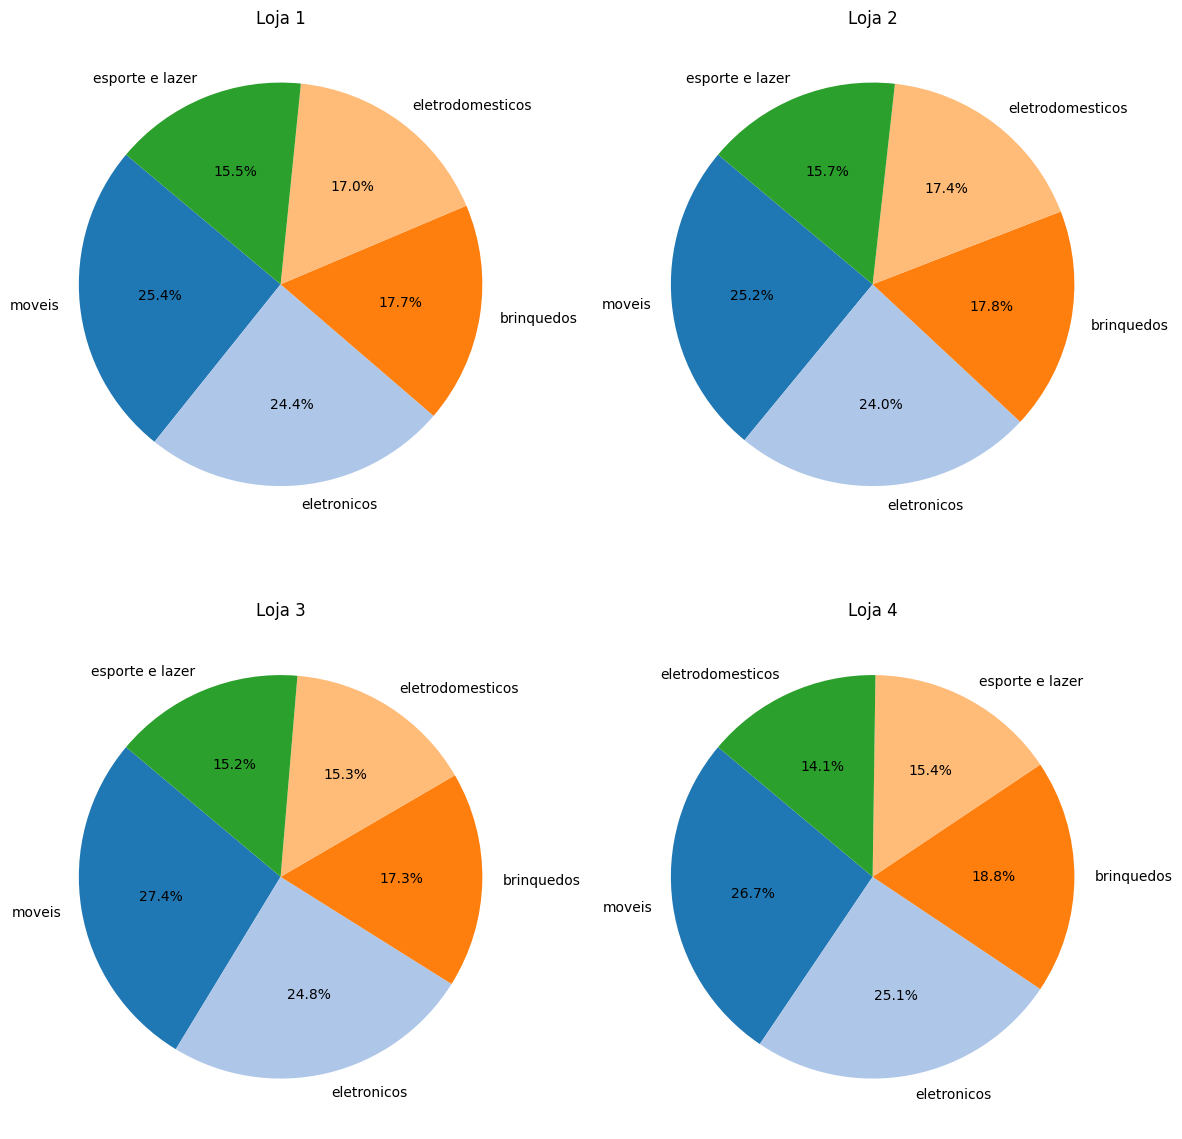

In [30]:
#plotando o gráfico com as 5 categorias mais vendidas em cada loja

dataframes = [loja, loja2, loja3, loja4]
nomes = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]

top_n = 5

fig, axes = plt.subplots(2, 2, figsize=(12,12))

for ax, nome, df in zip(axes.flatten(), nomes, dataframes):
    categorias_contagem = df["Categoria do Produto"].value_counts().head(top_n)

    ax.pie(categorias_contagem, labels=categorias_contagem.index,
           autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
    ax.set_title(f'{nome}')

plt.tight_layout()
plt.show()


# 3. Média de Avaliação das Lojas

In [12]:
#calculando a média de avaliação das lojas

media_loja1 = loja["Avaliação da compra"].mean()
media_loja2 = loja2["Avaliação da compra"].mean()
media_loja3 = loja3["Avaliação da compra"].mean()
media_loja4 = loja4["Avaliação da compra"].mean()

print("Média de avaliações Loja 1:", media_loja1)
print("Média de avaliações Loja 2:", media_loja2)
print("Média de avaliações Loja 3:", media_loja3)
print("Média de avaliações Loja 4:", media_loja4)

Média de avaliações Loja 1: 3.976685036032217
Média de avaliações Loja 2: 4.037303942348453
Média de avaliações Loja 3: 4.048325561678677
Média de avaliações Loja 4: 3.9957591178965224


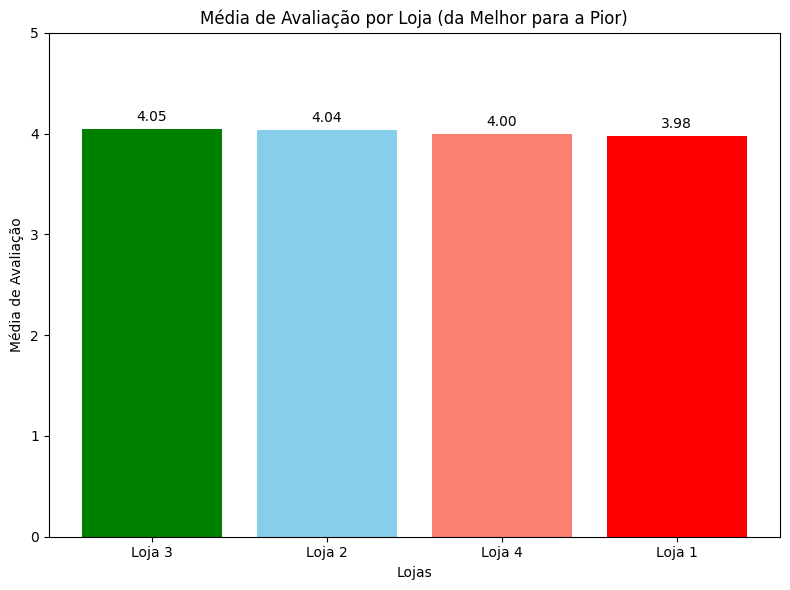

In [33]:
# plotando um gráfico com a média de avaliação de cada loja


import matplotlib.pyplot as plt
import pandas as pd

medias_avaliacao = {
    "Loja": ["Loja 1", "Loja 2", "Loja 3", "Loja 4"],
    "Média Avaliação": [
        loja["Avaliação da compra"].mean(),
        loja2["Avaliação da compra"].mean(),
        loja3["Avaliação da compra"].mean(),
        loja4["Avaliação da compra"].mean()
    ]
}

df_avaliacao = pd.DataFrame(medias_avaliacao)


df_avaliacao = df_avaliacao.sort_values(by="Média Avaliação", ascending=False)

cores = ['green', 'skyblue', 'salmon', 'red']

plt.figure(figsize=(8,6))
plt.bar(df_avaliacao["Loja"], df_avaliacao["Média Avaliação"], color=cores)
plt.title("Média de Avaliação por Loja (da Melhor para a Pior)")
plt.ylabel("Média de Avaliação")
plt.ylim(0, 5)
plt.xlabel("Lojas")

for i, valor in enumerate(df_avaliacao["Média Avaliação"]):
    plt.text(i, valor + 0.05, f'{valor:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()



# 4. Produtos Mais e Menos Vendidos

In [15]:
#Consultando os produtos mais e menos vendidos

dataframes = [loja, loja2, loja3, loja4]
nomes = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]

for nome, df in zip(nomes, dataframes):
    contagem_produtos = df["Produto"].value_counts()
    print(f"\n=== {nome} ===")
    print("Produtos mais vendidos:")
    print(contagem_produtos.head())
    print("Produtos menos vendidos:")
    print(contagem_produtos.tail())



=== Loja 1 ===
Produtos mais vendidos:
Produto
Micro-ondas           60
TV Led UHD 4K         60
Guarda roupas         60
Secadora de roupas    58
Cômoda                56
Name: count, dtype: int64
Produtos menos vendidos:
Produto
Ciência de dados com python    39
Pandeiro                       36
Panela de pressão              35
Headset                        33
Celular ABXY                   33
Name: count, dtype: int64

=== Loja 2 ===
Produtos mais vendidos:
Produto
Iniciando em programação    65
Micro-ondas                 62
Bateria                     61
Violão                      58
Pandeiro                    58
Name: count, dtype: int64
Produtos menos vendidos:
Produto
Fone de ouvido       37
Poltrona             35
Mesa de jantar       34
Impressora           34
Jogo de tabuleiro    32
Name: count, dtype: int64

=== Loja 3 ===
Produtos mais vendidos:
Produto
Kit banquetas      57
Mesa de jantar     56
Cama king          56
Jogo de panelas    55
Cômoda             55
Name: 

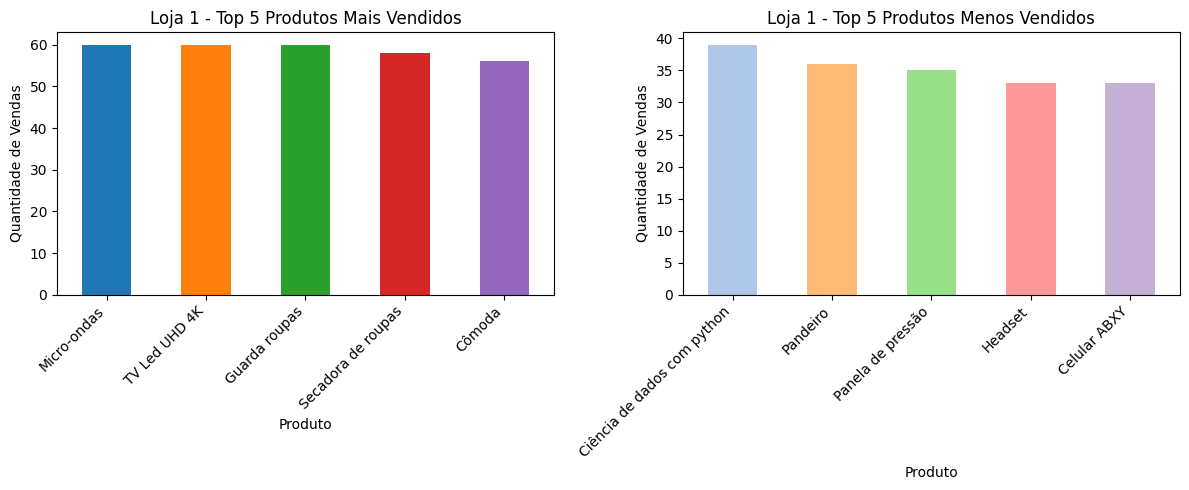

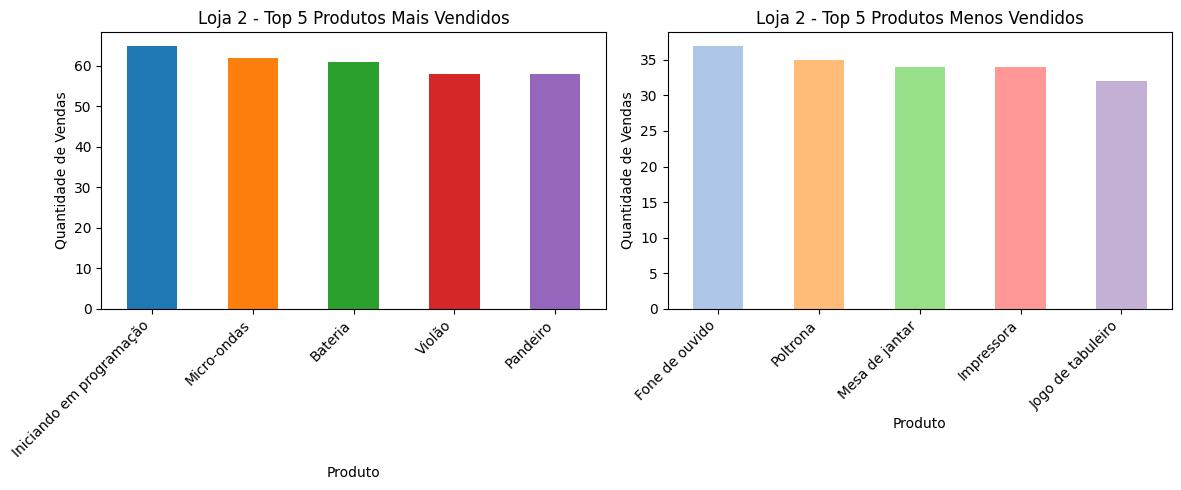

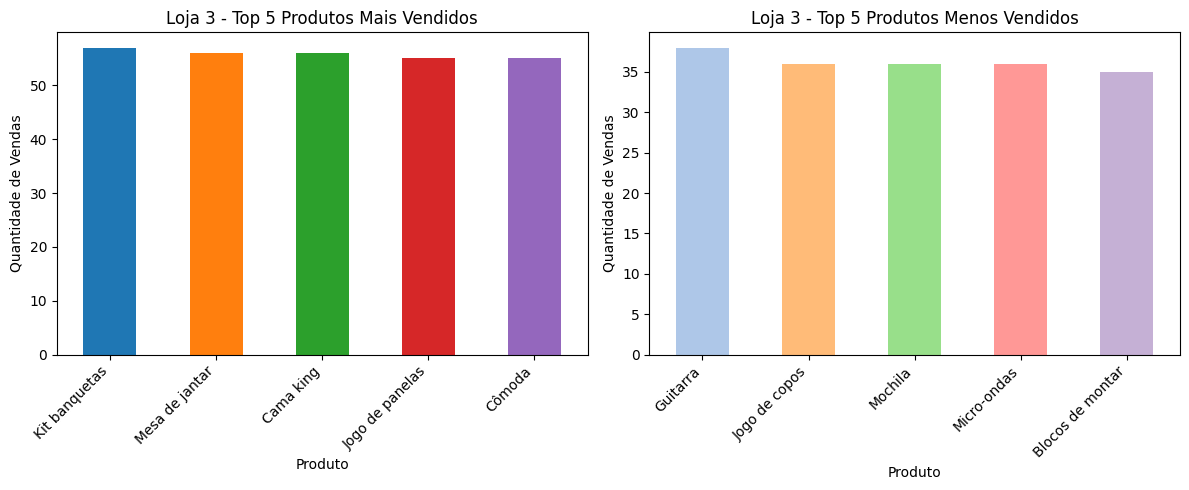

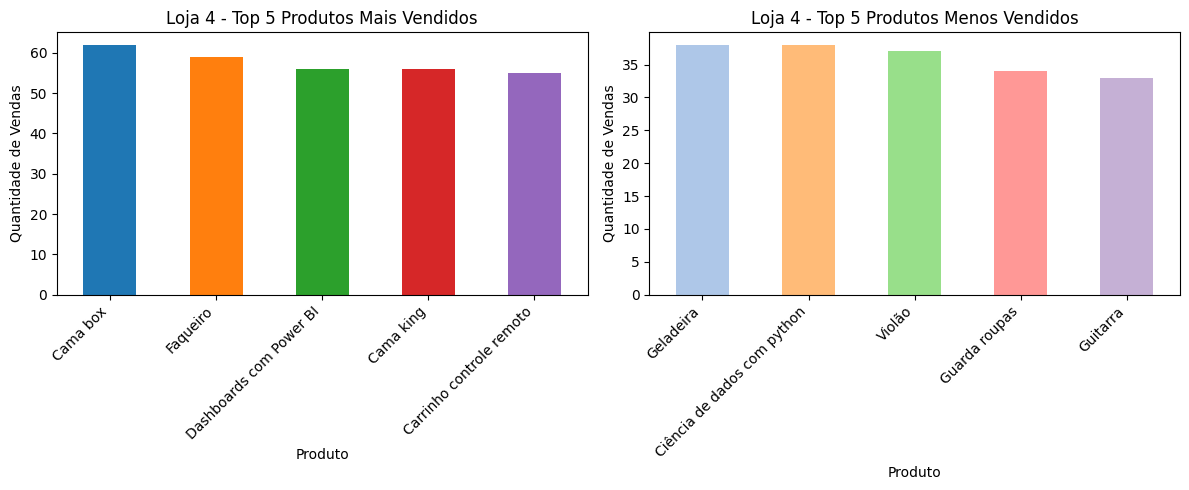

In [42]:
import matplotlib.pyplot as plt

dataframes = [loja, loja2, loja3, loja4]
nomes = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]

top_n = 5
bottom_n = 5


cores_top = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
cores_bottom = ['#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5']

for nome, df in zip(nomes, dataframes):
    contagem_produtos = df["Produto"].value_counts()

    top = contagem_produtos.head(top_n)
    bottom = contagem_produtos.tail(bottom_n)

    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    top.plot(kind='bar', color=cores_top)
    plt.title(f'{nome} - Top {top_n} Produtos Mais Vendidos')
    plt.ylabel('Quantidade de Vendas')
    plt.xticks(rotation=45, ha='right')

    plt.subplot(1,2,2)
    bottom.plot(kind='bar', color=cores_bottom)
    plt.title(f'{nome} - Top {bottom_n} Produtos Menos Vendidos')
    plt.ylabel('Quantidade de Vendas')
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()


# 5. Frete Médio por Loja


In [41]:
#Calculando o frete médio de loja e ordenando por valor decrescente


fretes = {
    "Loja": ["Loja 1", "Loja 2", "Loja 3", "Loja 4"],
    "Frete Médio": [
        round(loja["Frete"].mean(), 2),
        round(loja2["Frete"].mean(), 2),
        round(loja3["Frete"].mean(), 2),
        round(loja4["Frete"].mean(), 2)
    ]
}

df_fretes = pd.DataFrame(fretes)

df_fretes_ordenado = df_fretes.sort_values(by="Frete Médio", ascending=False)

print(df_fretes_ordenado)



     Loja  Frete Médio
0  Loja 1        34.69
1  Loja 2        33.62
2  Loja 3        33.07
3  Loja 4        31.28


# **Relatório final**


O objetivo desta análise é auxiliar os proprietários da rede Alura Store a identificar qual de suas lojas apresenta o menor rendimento. Essa análise servirá de base para a decisão de qual loja vender, no intuito de gerar capital para um novo empreendimento.

Os dados analisados correspondem às vendas de suas quatro lojas no período de 01/2020 até 03/2023.





---



Das quatro filiais, a de número quatro é a que apresenta o menor faturamento, totalizando 1.384.497,58 em vendas no período analisado. Esse valor é aproximadamente 9,77% menor que o faturamento da loja 1, que vendeu R$ 1.534.509,12 no mesmo período.

Não há, entre as lojas, diferença entre as categorias de vendas que possa justificar a diferença no faturamento. Todas elas possuem como mais vendidas as seguintes categorias:

1. Móveis

2. Eletrônicos

3. Brinquedos

O valor médio do frete da unidade quatro também é o menor entre as lojas:

Loja 1: 34,69

Loja 2: 33,62

Loja 3: 33,07

Loja 4: 31,28

A diferença de avaliação entre as lojas é baixa, sendo de apenas 0,07 entre a melhor avaliada (loja 3) e a pior avaliada (loja 1).

Com base nos dados analisados, sugerimos o fechamento da loja quatro, pois apresenta um faturamento menor entre as lojas e, mesmo sendo a que possui a melhor avaliação entre elas, não consegue manter um bom fluxo de vendas.
